#notebooks.model performances

## Setup

In [1]:
import os
os.chdir("smart_microfluidics")

In [2]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
random_forest_model = "models/random_forest_model.pkl"
xgboost_model = "models/xgboost_model.pkl"
inverse_xgboost_model = "models/inverse_xgboost_model.pkl"

In [4]:
validation_data = pd.read_csv("data/validation_set_1.csv")
validation_data = validation_data.rename(columns={"TFR": "TFR "})

In [5]:
y_test_size = validation_data["SIZE"]
y_test_pdi = validation_data["PDI"]
feature_columns = ["ML", "CHIP", "TLP", "ESM", "HSPC", "CHOL", "PEG", "TFR ", "FRR", "BUFFER", "OUTPUT"]
X_validation = validation_data[feature_columns]

## Auxiliary functions

In [6]:
def evaluate_model(y_test, y_pred, label="SIZE"):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Performance Metrics for {label}:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

In [7]:
def plot_actual_vs_pred(y_test, y_pred, label="SIZE"):
    plt.figure(figsize=(7, 7))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Perfect fit line
    plt.xlabel(f"Actual {label}")
    plt.ylabel(f"Predicted {label}")
    plt.title(f"Actual vs. Predicted {label}")
    plt.show()

In [8]:
def plot_residuals(y_test, y_pred, label="SIZE"):
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Residual Distribution for {label}")
    plt.show()

## ML performances

### Random forest regressor

In [9]:
with open(random_forest_model, "rb") as file:
  rfm = pickle.load(file)
y_pred_size = rfm.predict(X_validation)[:, 0]
y_pred_pdi = rfm.predict(X_validation)[:, 1]

In [10]:
evaluate_model(y_test_size, y_pred_size, label="SIZE")
evaluate_model(y_test_pdi, y_pred_pdi, label="PDI")

Performance Metrics for SIZE:
R² Score: 0.0027
Mean Absolute Error (MAE): 25.0049
Mean Squared Error (MSE): 891.7800
Root Mean Squared Error (RMSE): 29.8627

Performance Metrics for PDI:
R² Score: -1.8780
Mean Absolute Error (MAE): 0.0624
Mean Squared Error (MSE): 0.0076
Root Mean Squared Error (RMSE): 0.0871



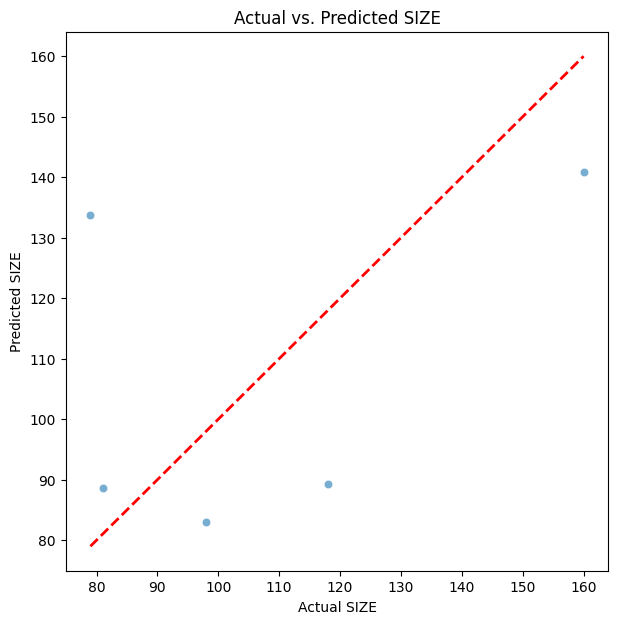

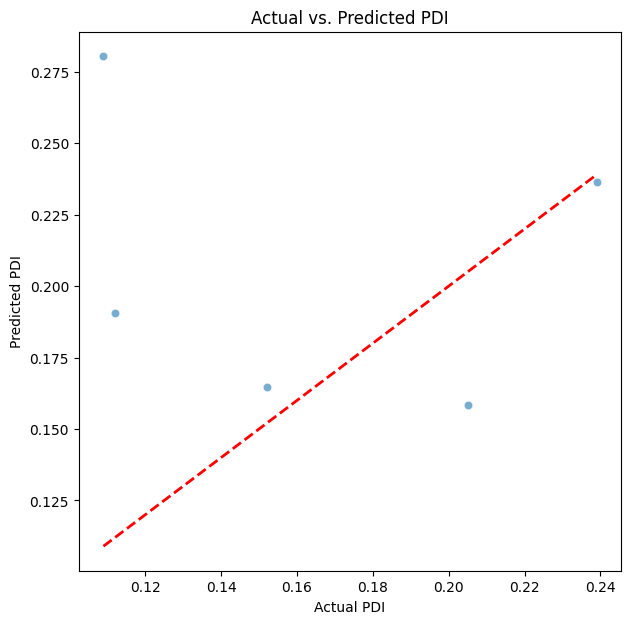

In [11]:
plot_actual_vs_pred(y_test_size, y_pred_size, label="SIZE")
plot_actual_vs_pred(y_test_pdi, y_pred_pdi, label="PDI")

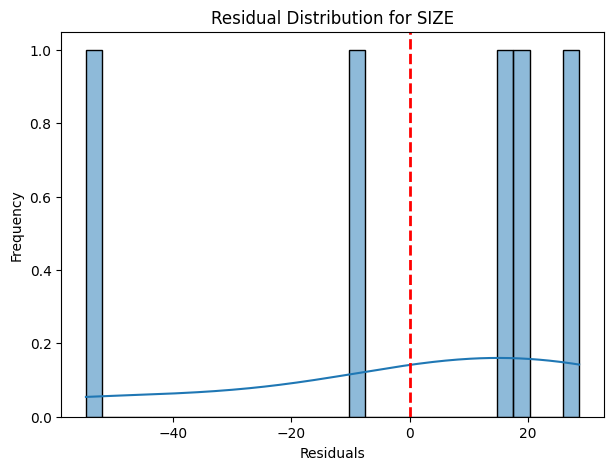

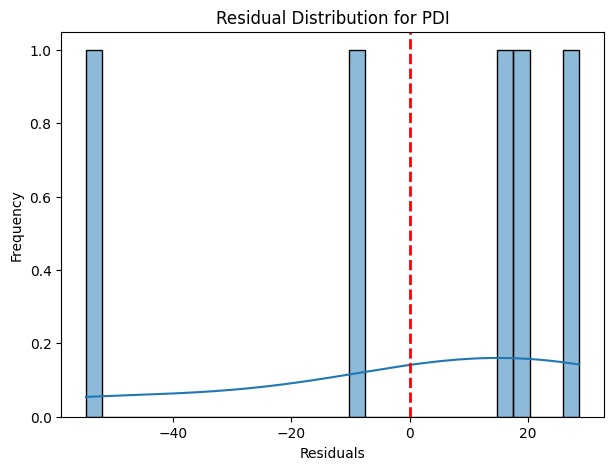

In [12]:
plot_residuals(y_test_size, y_pred_size, label="SIZE")
plot_residuals(y_test_size, y_pred_size, label="PDI")

### XGBoost

In [13]:
with open(xgboost_model, "rb") as file:
  xgb = pickle.load(file)
y_pred_size = xgb.predict(X_validation)[:, 0]
y_pred_pdi = xgb.predict(X_validation)[:, 1]

In [14]:
evaluate_model(y_test_size, y_pred_size, label="SIZE")
evaluate_model(y_test_pdi, y_pred_pdi, label="PDI")

Performance Metrics for SIZE:
R² Score: -0.9624
Mean Absolute Error (MAE): 35.1965
Mean Squared Error (MSE): 1754.7301
Root Mean Squared Error (RMSE): 41.8895

Performance Metrics for PDI:
R² Score: 0.3946
Mean Absolute Error (MAE): 0.0322
Mean Squared Error (MSE): 0.0016
Root Mean Squared Error (RMSE): 0.0399



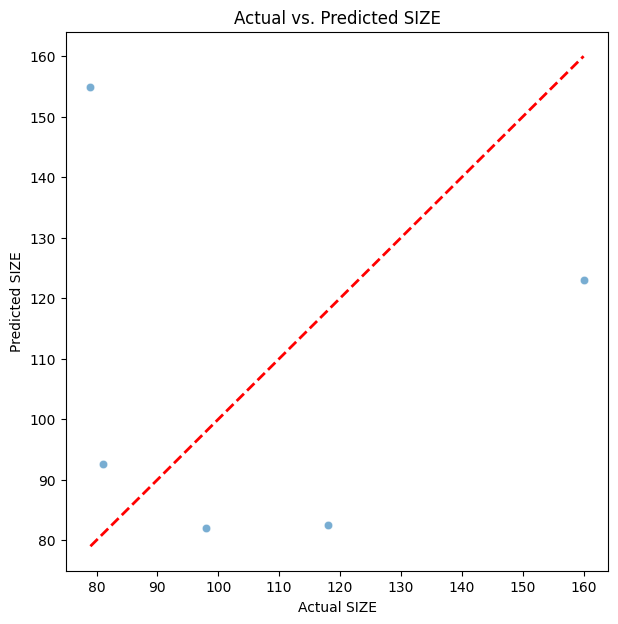

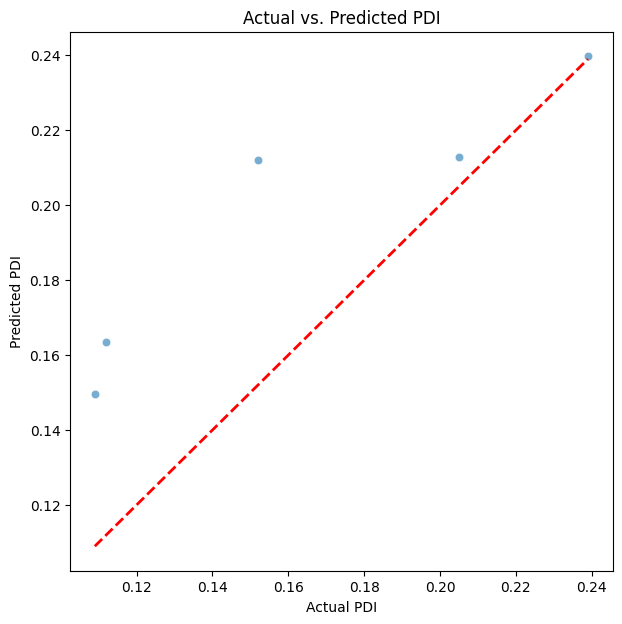

In [15]:
plot_actual_vs_pred(y_test_size, y_pred_size, label="SIZE")
plot_actual_vs_pred(y_test_pdi, y_pred_pdi, label="PDI")

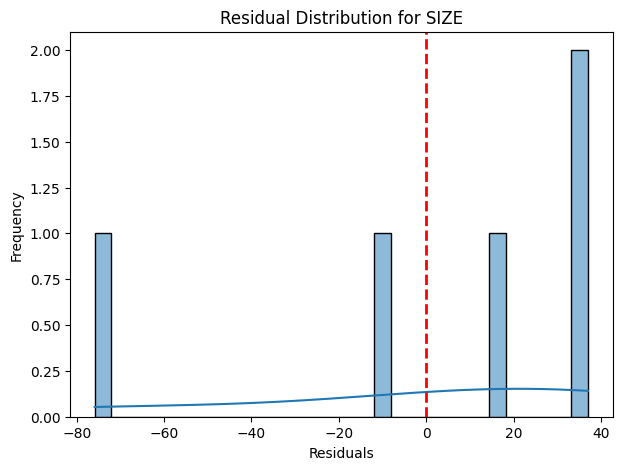

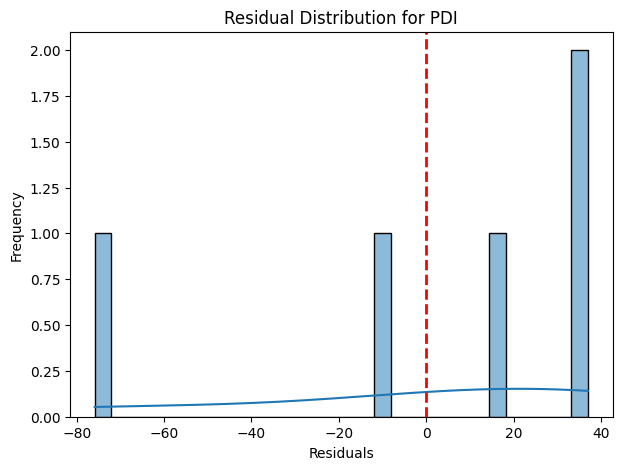

In [16]:
plot_residuals(y_test_size, y_pred_size, label="SIZE")
plot_residuals(y_test_size, y_pred_size, label="PDI")